# Assignment 6

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).

``Objectives``

* This assignment connects all the pieces involved in training feed-forward fully connected neural networks (FFNN); 

* You will run a full set of experiments to explore different hyperparameters and hidden layer sizes for two datasets, and then document your findings.

``Data``
* Digits MNIST
* Fashion MNIST

### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from keras.datasets import fashion_mnist
from keras.datasets import mnist

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

In [13]:
# Load the Fashion MNIST dataset.
(X_train_fashion, Y_train_fashion), (X_test_fashion, Y_test_fashion) = fashion_mnist.load_data()

# Load the Digits MNIST dataset.
(X_train_digits, Y_train_digits), (X_test_digits, Y_test_digits) = mnist.load_data()

---
### Step 2: Data preprocessing

``Fashion MNIST``

In [14]:
# Normalize
X_train_fashion = X_train_fashion / 255.
X_test_fashion = X_test_fashion / 255.

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_fashion = Y_train_fashion.flatten()
Y_test_fashion = Y_test_fashion.flatten()

label_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_fashion.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_fashion = X_train_fashion[shuffled_indices]
Y_train_fashion = Y_train_fashion[shuffled_indices]

``Digits MNIST``

In [15]:
# Normalize
X_train_digits = X_train_digits / 255
X_test_digits = X_test_digits / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
Y_train_digits = Y_train_digits.flatten()
Y_test_digits = Y_test_digits.flatten()

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(X_train_digits.shape[0])
shuffled_indices = np.random.permutation(indices)
X_train_digits = X_train_digits[shuffled_indices]
Y_train_digits = Y_train_digits[shuffled_indices]

---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following task:

1. Show the first training example in X_train_fashion;
2. Show the first training example in X_train_digits;
3. Display the first 5 images in X_train_digits for each class in Y_train_digits, arranged in a 10x5 grid. 

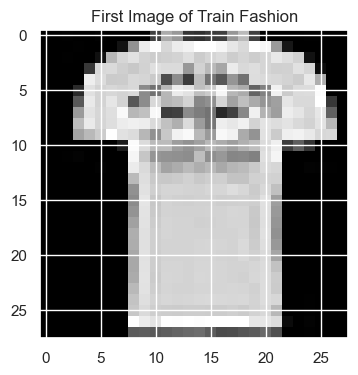

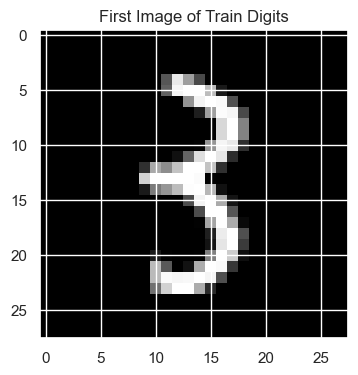

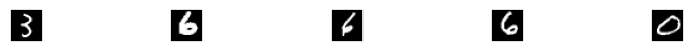

In [20]:
# YOUR CODE HERE
first_image_x_train_fashion = X_train_fashion[0]
plt.figure(figsize=(4,4))
plt.imshow(first_image_x_train_fashion,cmap='gray')
plt.title("First Image of Train Fashion")
#plt.axes("off")
plt.show()

first_image_x_train_digits = X_train_digits[0]
plt.figure(figsize=(4,4))
plt.imshow(first_image_x_train_digits, cmap='gray')
plt.title("First Image of Train Digits")
#plt.axes("off")
plt.show()

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_digits[i],cmap='gray')
plt.show()


### Step 4: Modeling

### <span style="color:chocolate">Exercise 2:</span> Define model (20 points)

1. Fill in the <span style="color:chocolate">build_model()</span> function below, including all the arguments listed in the function definition. Note: the activation function parameter is only for the the hidden layers; use the appropriate final classification function for the final layer.

In [26]:
def build_model(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='SGD',
                learning_rate=0.01,
                metric='metric'):
    """Build a multi-class logistic regression model using Keras.

    Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.
    metric: The desired metric.

    Returns:
    model: A tf.keras model (graph).
    """
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)

    # YOUR CODE HERE
    #Initializing sequential model
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Adding hidden layers
    for hidden_layer_size in hidden_layer_sizes:
        model.add(tf.keras.layers.Dense(units=hidden_layer_size, activation=activation))

    # Adding output layer with softmax activation for multi-class classification
    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

    # Choosing the optimizer and setting the learning rate
    if optimizer == 'SGD':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Please use 'SGD' or 'Adam'.")

    # Compiling the model with the specified optimizer, loss function, and metric
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=[metric])

    return model


---
### Step 5: Experiments

You can now run a suite of experiments to see how the hyperparameters and layer sizes effect model performance. 

The <span style="color:chocolate">train_and_evaluate()</span> function below can be used to run experiments and retrieve results.

c:\Users\tgeod\Downloads\UC Berkeley\DATASCI 207 - Applied Machine Learning\Week 3 - Feature Engineering\myvirtualenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the digits model...


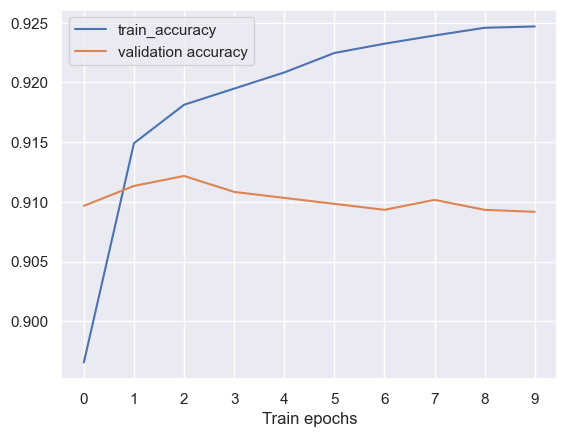

Training accuracy: 0.9247
Validation accuracy: 0.9092


In [27]:
def train_and_evaluate(data='digits',
                       hidden_layer_sizes=[],
                       activation='tanh',
                       optimizer='Adam',
                       learning_rate=0.01,
                       metric='accuracy',
                       num_epochs=10):

  # Build the model.
    model = build_model(n_classes=10,
                      hidden_layer_sizes=hidden_layer_sizes,
                      activation=activation,
                      optimizer=optimizer,
                      metric=metric,
                      learning_rate=learning_rate)

  # Select the dataset.
    if data == 'digits':
        X_train = X_train_digits
        X_test = X_test_digits
        Y_train = Y_train_digits
        Y_test = Y_test_digits
    
    elif data == 'fashion':
        X_train = X_train_fashion
        X_test = X_test_fashion
        Y_train = Y_train_fashion
        Y_test = Y_test_fashion
    else:
        raise 'Unsupported dataset: %s' %data

  # Train the model.
    print('Training the', data, 'model...')
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=num_epochs,
        batch_size=64,
        validation_split=0.1,
        verbose=0)

    # Retrieve the training metrics (after each train epoch) and the final validation
    # accuracy.
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(val_accuracy, label='validation accuracy')
    plt.xticks(range(num_epochs))
    plt.xlabel('Train epochs')
    plt.legend()
    plt.show()
    
    print('Training accuracy: %1.4f' %train_accuracy[-1])
    print('Validation accuracy: %1.4f' %val_accuracy[-1])
    
    return model


# run the function
model = train_and_evaluate()

### <span style="color:chocolate">Exercise 3:</span> Ablation study (50 points)

1. Conduct experiments and record the training and validation set accuracy results in the table below. You may extend the table for additional experiments as needed.
2. Report the hyperparameter values for your preferred architecture configuration.
3. Run the model once more using your preferred hyperparameter configuration.

Data | Hidden sizes | Activation| Optimizer | Learning rate | #Parameters | Training accuracy| Validation accuracy
-|-|-|-|-|-|-|-
 digits | [] | tanh | SGD |0.01| 7850 | |
 digits | [] | relu | SGD |0.01| 7850 | |
 digits | [] | relu | Adam |0.01| 7850 | |
 digits | [128] | relu | Adam |0.01| 101770 | |
 digits | [256, 128] | relu | Adam |0.01| 235146 | |
-|-|-|-|-|-|-|-
 fashion | [] | tanh | SGD |0.01| 7850 | |
 fashion | [] | relu | SGD |0.01| 7850 | |
 fashion | [] | relu | Adam |0.01| 7850 | |
 fashion | [128] | relu | Adam |0.01| 101770 | |
 fashion | [256, 128] | relu | Adam |0.01| 235146 | |

Training the digits model...


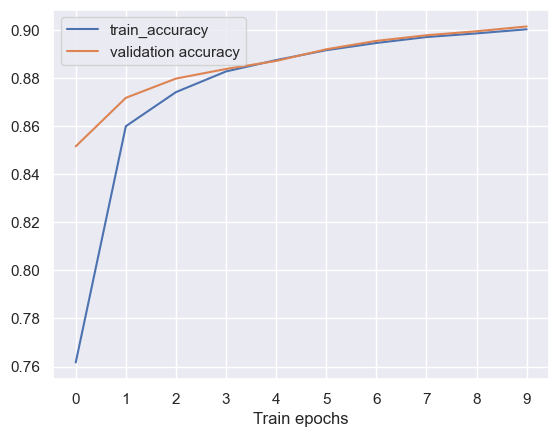

Training accuracy: 0.9001
Validation accuracy: 0.9013
Training the digits model...


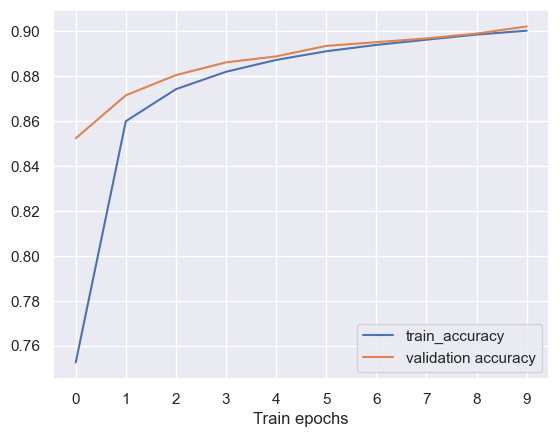

Training accuracy: 0.9003
Validation accuracy: 0.9022
Training the digits model...


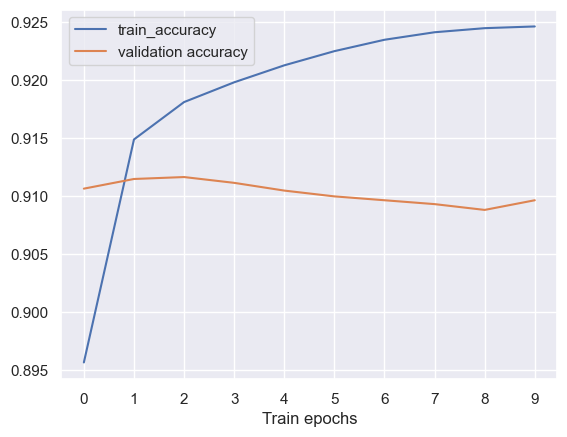

Training accuracy: 0.9246
Validation accuracy: 0.9097
Training the digits model...


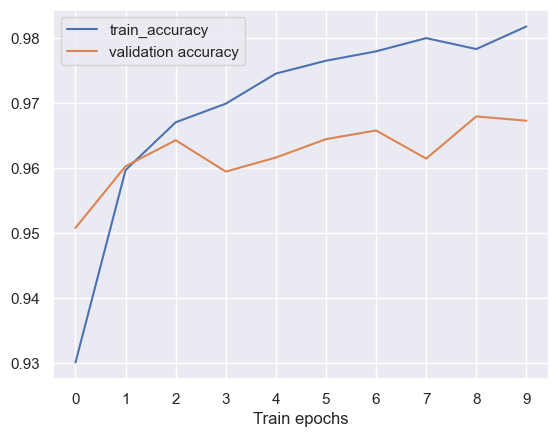

Training accuracy: 0.9819
Validation accuracy: 0.9673
Training the digits model...


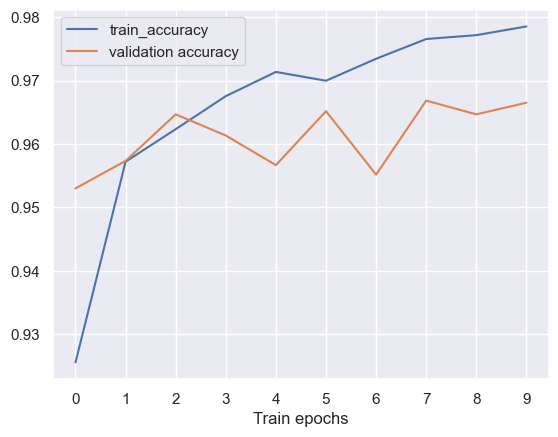

Training accuracy: 0.9785
Validation accuracy: 0.9665
Training the fashion model...


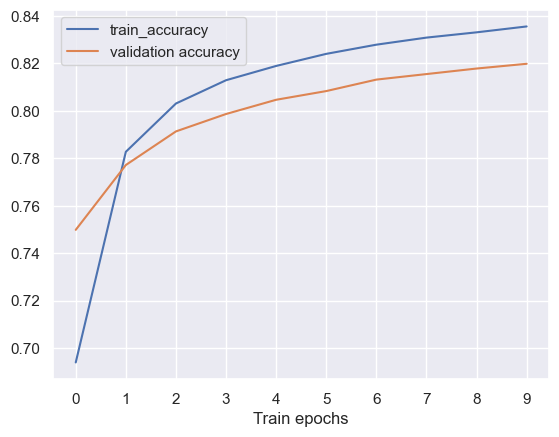

Training accuracy: 0.8356
Validation accuracy: 0.8198
Training the fashion model...


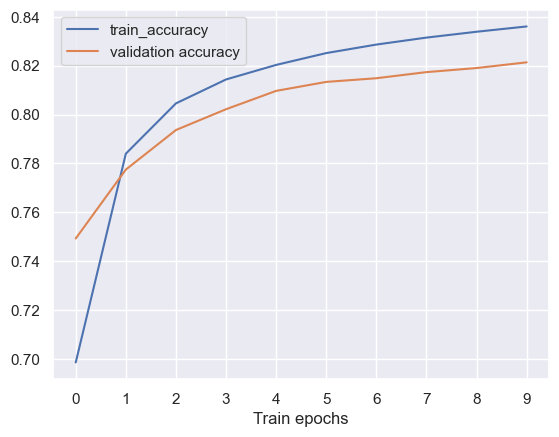

Training accuracy: 0.8360
Validation accuracy: 0.8213
Training the fashion model...


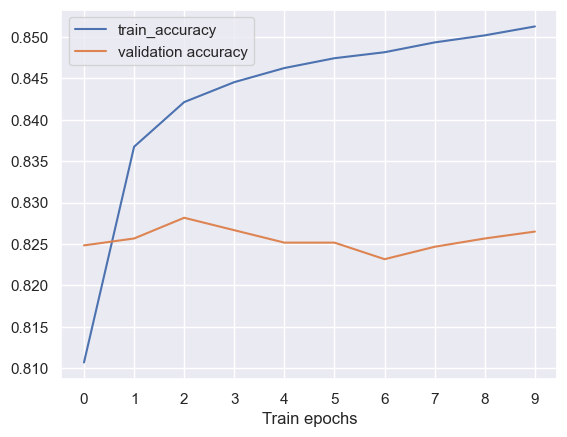

Training accuracy: 0.8513
Validation accuracy: 0.8265
Training the fashion model...


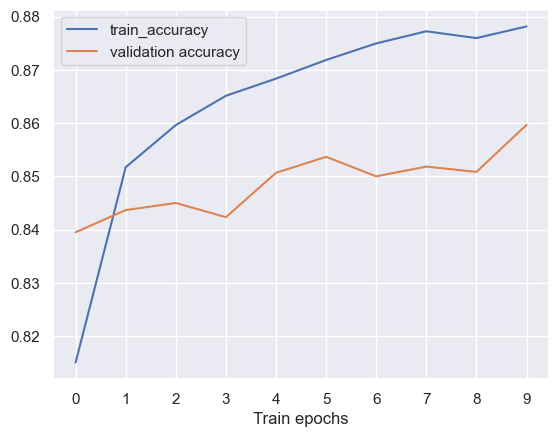

Training accuracy: 0.8781
Validation accuracy: 0.8597
Training the fashion model...


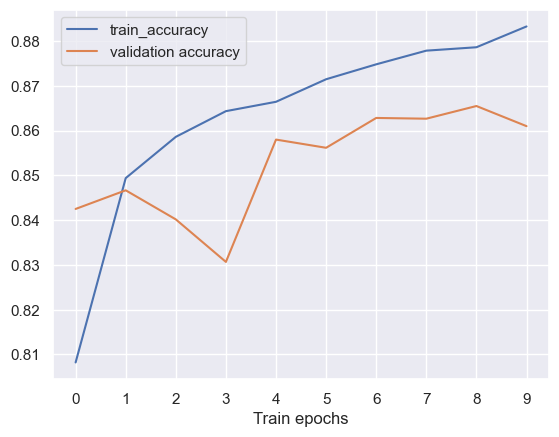

Training accuracy: 0.8833
Validation accuracy: 0.8610
      Data Hidden sizes Activation Optimizer  Learning rate  #Parameters  \
0   digits           []       tanh       SGD           0.01         7850   
1   digits           []       relu       SGD           0.01         7850   
2   digits           []       relu      Adam           0.01         7850   
3   digits        [128]       relu      Adam           0.01       101770   
4   digits   [256, 128]       relu      Adam           0.01       235146   
5  fashion           []       tanh       SGD           0.01         7850   
6  fashion           []       relu       SGD           0.01         7850   
7  fashion           []       relu      Adam           0.01         7850   
8  fashion        [128]       relu      Adam           0.01       101770   
9  fashion   [256, 128]       relu      Adam           0.01       235146   

   Training accuracy  Validation accuracy  
0           0.900148             0.901333  
1           0.900278 

In [28]:
# YOUR CODE HERE

#function to get the number of parameters in the model
def get_model_params(data, hidden_layer_sizes, activation, optimizer, learning_rate):
    model = build_model(n_classes=10,
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        optimizer=optimizer,
                        learning_rate=learning_rate,
                        metric='accuracy')
    return model.count_params()

#function to iterate over the configurations, train the model, and record the results.
def evaluate_configurations(configurations):
    results = []
    for config in configurations:
        data, hidden_layer_sizes, activation, optimizer, learning_rate = config
        num_parameters = get_model_params(data, hidden_layer_sizes, activation, optimizer, learning_rate)
        model = train_and_evaluate(data=data,
                                   hidden_layer_sizes=hidden_layer_sizes,
                                   activation=activation,
                                   optimizer=optimizer,
                                   learning_rate=learning_rate,
                                   metric='accuracy',
                                   num_epochs=10)
        # Train and validation accuracies
        train_acc = model.history.history['accuracy'][-1]
        val_acc = model.history.history['val_accuracy'][-1]
        results.append([data, hidden_layer_sizes, activation, optimizer, learning_rate, num_parameters, train_acc, val_acc])
    return results

# Configurations to evaluate
configurations = [
    ('digits', [], 'tanh', 'SGD', 0.01),
    ('digits', [], 'relu', 'SGD', 0.01),
    ('digits', [], 'relu', 'Adam', 0.01),
    ('digits', [128], 'relu', 'Adam', 0.01),
    ('digits', [256, 128], 'relu', 'Adam', 0.01),
    ('fashion', [], 'tanh', 'SGD', 0.01),
    ('fashion', [], 'relu', 'SGD', 0.01),
    ('fashion', [], 'relu', 'Adam', 0.01),
    ('fashion', [128], 'relu', 'Adam', 0.01),
    ('fashion', [256, 128], 'relu', 'Adam', 0.01),
]

# Evaluating all configurations
results = evaluate_configurations(configurations)

# Creating DataFrame
columns = ['Data', 'Hidden sizes', 'Activation', 'Optimizer', 'Learning rate', '#Parameters', 'Training accuracy', 'Validation accuracy']
results_df = pd.DataFrame(results, columns=columns)
print(results_df)


---
### Step 6: Evaluation and Generalization

### <span style="color:chocolate">Exercise 4:</span> Compute metrics (25 points)

Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

1. Calculate accuracy on both train and test datasets. Note: you will need to convert the vector of predicted probabilities to a class label using the argmax operation. Hint: You can utilize the <span style="color:chocolate">model.predict()</span> method provided by tf.keras and the <span style="color:chocolate">np.max()</span> method available in NumPy; or you can use the <span style="color:chocolate">model.evaluare()</span> method provided by tf.keras directly.

2. Does the model demonstrate strong generalization capabilities? Provide an explanation based on your accuracy observations.

In [29]:
# YOUR CODE HERE

#optimal set of hyperparameters for digits dataset
data = 'digits'
hidden_layer_sizes = [128]
activation = 'relu'
optimizer = 'Adam'
learning_rate = 0.01
metric = 'accuracy'
num_epochs = 10

#Selecting the dataset
if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion

#Building the model
model = build_model(n_classes=10,
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    optimizer=optimizer,
                    learning_rate=learning_rate,
                    metric=metric)

#Training the model
history = model.fit(x=X_train, y=Y_train, epochs=num_epochs, batch_size=64, validation_split=0.1, verbose=0)

#Evaluating the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
print(f'Training accuracy: {train_accuracy:.4f}')

#Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

'''The model demonstrates good generalization capabilities. The test data accuracy is closer to the training data accuracy.'''

c:\Users\tgeod\Downloads\UC Berkeley\DATASCI 207 - Applied Machine Learning\Week 3 - Feature Engineering\myvirtualenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training accuracy: 0.9749
Test accuracy: 0.9634


In [31]:
# YOUR CODE HERE

#optimal set of hyperparameters for fashion dataset
data = 'fashion'
hidden_layer_sizes = [256,128]
activation = 'relu'
optimizer = 'Adam'
learning_rate = 0.01
metric = 'accuracy'
num_epochs = 10

#Selecting the dataset
if data == 'digits':
    X_train = X_train_digits
    X_test = X_test_digits
    Y_train = Y_train_digits
    Y_test = Y_test_digits
elif data == 'fashion':
    X_train = X_train_fashion
    X_test = X_test_fashion
    Y_train = Y_train_fashion
    Y_test = Y_test_fashion

#Building the model
model = build_model(n_classes=10,
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    optimizer=optimizer,
                    learning_rate=learning_rate,
                    metric=metric)

#Training the model
history = model.fit(x=X_train, y=Y_train, epochs=num_epochs, batch_size=64, validation_split=0.1, verbose=0)

#Evaluating the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
print(f'Training accuracy: {train_accuracy:.4f}')

#Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

'''The model demonstrates good generalization capabilities. The test data accuracy is closer to the training data accuracy.'''

Training accuracy: 0.8853
Test accuracy: 0.8604


'The model demonstrates good generalization capabilities. The test data accuracy is closer to the training data accuracy.'